In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

In [2]:
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import Video

import specless as sl
from specless.minigrid.tspenv import TSPEnv  # NOQA

LOG_DIR: Path = Path.cwd().joinpath(".log")
print(str(LOG_DIR))

/Users/kandai/Documents/projects/dev/specless/examples/demo/.log


/usr/local/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


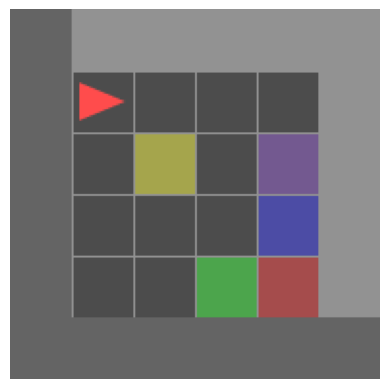

In [3]:
env = gym.make("MiniGrid-TSP-v0", render_mode="rgb_array", seed=3)
env = sl.LabelMiniGridWrapper(env, labelkey="label", skiplist=["empty"])
env = sl.SelectStateDataWrapper(env, columns=["label"])

env.reset()
plt.imshow(env.render())
plt.axis("off")
plt.show()

In [4]:
action_dict = {a.name: a for a in env.actions}
for k, v in action_dict.items():
    print(k, v)

left 0
right 1
forward 2
pickup 3
drop 4
toggle 5
done 6


/usr/local/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.actions to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.actions` for environment variables or `env.get_wrapper_attr('actions')` that will search the reminding wrappers.
  logger.warn(


In [5]:
demonstrations = []

action_strs: list[str] = [
    "right",
    "forward",
    "left",
    "forward",
    "forward",
    "forward",
    "right",
    "forward",
    "forward",
    "forward",
    "right",
    "forward",
]

states, actions, video_path = sl.simulate(
    env,
    [action_dict[a_s] for a_s in action_strs],
    add_timestamp=True,
    record_video=True,
    video_folder=os.path.join(os.getcwd(), "1"),
)
Video(video_path, embed=True, html_attributes="controls muted autoplay loop")
demonstrations.append(states)

action_strs = [
    "forward",
    "right",
    "forward",
    "forward",
    "forward",
    "left",
    "forward",
    "forward",
    "left",
    "forward",
    "forward",
]

states, actions, video_path = sl.simulate(
    env,
    [action_dict[a_s] for a_s in action_strs],
    add_timestamp=True,
    record_video=True,
    video_folder=os.path.join(os.getcwd(), "2"),
)
Video(video_path, embed=True, html_attributes="controls muted autoplay loop")
demonstrations.append(states)

/usr/local/lib/python3.11/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /Users/kandai/Documents/projects/dev/specless/examples/demo/1 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


Moviepy - Building video /Users/kandai/Documents/projects/dev/specless/examples/demo/1/rl-video-step-0.mp4.
Moviepy - Writing video /Users/kandai/Documents/projects/dev/specless/examples/demo/1/rl-video-step-0.mp4



/usr/local/lib/python3.11/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /Users/kandai/Documents/projects/dev/specless/examples/demo/2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


Moviepy - Done !
Moviepy - video ready /Users/kandai/Documents/projects/dev/specless/examples/demo/1/rl-video-step-0.mp4
Moviepy - Building video /Users/kandai/Documents/projects/dev/specless/examples/demo/2/rl-video-step-0.mp4.
Moviepy - Writing video /Users/kandai/Documents/projects/dev/specless/examples/demo/2/rl-video-step-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/kandai/Documents/projects/dev/specless/examples/demo/2/rl-video-step-0.mp4


In [6]:
print(demonstrations[0])
print(demonstrations[1])

demonstrations = sl.TPOInferenceAlgorithm.format_timed_traces(demonstrations)

print(demonstrations[0])
print(demonstrations[1])

[[0, ''], [1, ''], [2, ''], [3, ''], [4, 'floor_yellow'], [5, ''], [6, 'floor_purple'], [7, 'floor_purple'], [8, 'floor_blue'], [9, 'floor_red'], [10, 'floor_red'], [11, 'floor_red'], [12, 'floor_green']]
[[0, ''], [1, ''], [2, ''], [3, 'floor_yellow'], [4, ''], [5, ''], [6, ''], [7, 'floor_green'], [8, 'floor_red'], [9, 'floor_red'], [10, 'floor_blue'], [11, 'floor_purple']]
[(4, 'floor_yellow'), (6, 'floor_purple'), (8, 'floor_blue'), (9, 'floor_red'), (12, 'floor_green')]
[(3, 'floor_yellow'), (7, 'floor_green'), (8, 'floor_red'), (10, 'floor_blue'), (11, 'floor_purple')]


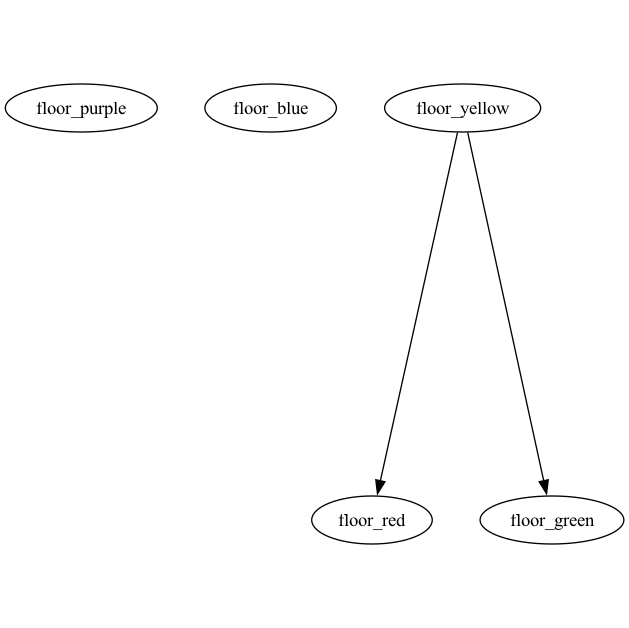

	6 <= t_floor_purple <= 11
	8 <= t_floor_blue <= 10
	8 <= t_floor_red <= 9
	7 <= t_floor_green <= 12
	3 <= t_floor_yellow <= 4
	5.0 <= t_floor_red - t_floor_yellow <= 5.0
	4.0 <= t_floor_green - t_floor_yellow <= 8.0



In [7]:
inference = sl.TPOInferenceAlgorithm()
columns: list = ["timestamp", "symbol"]
timedtrace_dataset = sl.ArrayDataset(demonstrations, columns)
specification: sl.Specification = inference.infer(timedtrace_dataset)

filepath = os.path.join(LOG_DIR, "tpo.png")
sl.draw_graph(specification, filepath)
print(specification)

/usr/local/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/usr/local/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.actions to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.actions` for environment variables or `env.get_wrapper_attr('actions')` that will search the reminding wrappers.
  logger.warn(


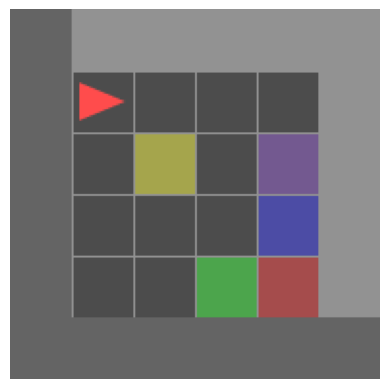

In [8]:
env = gym.make("MiniGrid-TSP-v0", render_mode="rgb_array", seed=3)
env = sl.MiniGridTransitionSystemWrapper(env, ignore_direction=True)
env.reset()
plt.imshow(env.render())
plt.axis("off")
plt.show()

In [9]:
synthesizer = sl.TSPSynthesisAlgorithm()

strategy = synthesizer.synthesize(env, specification, num_agent=2)
print(strategy)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-14
Set parameter TimeLimit to value 1800
edges[0,1]: 1.0
edges[0,5]: 1.0
edges[1,3]: 1.0
edges[2,0]: 1.0
edges[3,4]: 1.0
edges[4,0]: 1.0
edges[5,2]: 1.0
times[1]: 3.0
times[2]: 11.0
times[3]: 7.0
times[4]: 10.0
times[5]: 8.0
timesTerminal[0,0]: 16.0
timesTerminal[1,0]: 16.0
tFinal: 16.0
Total matching score: 15.999999999999988


In [ ]:
for i, s in enumerate(strategy.strategies):
    states, actions, video_path = sl.simulate(
        env,
        s,
        record_video=True,
        video_folder=os.path.join(LOG_DIR, str(i)),
    )

    Video(video_path, embed=True, html_attributes="controls muted autoplay loop")

In [ ]:
from specless.automaton.pdfa import PDFA

env = gym.make("MiniGrid-TSP-v0", render_mode="rgb_array", seed=3)
env = sl.MiniGridTransitionSystemWrapper(
    env, ignore_direction=True, skip_observations=["unseen", "wall"]
)
env.reset()
plt.imshow(env.render())
plt.axis("off")
plt.show()

pdfabuilder = sl.PDFABuilder()
pdfa: PDFA = pdfabuilder(os.path.join(os.getcwd(), "pdfa.yaml"))

synthesizer = sl.ProductGraphSynthesisAlgorithm()
strategy = synthesizer.synthesize(env, pdfa)
print(strategy)

# More environments


In [ ]:
ENV_ID = "MiniGrid-TSPBenchmarkEnv-v0"
env = gym.make(
    ENV_ID,
    num_locations=5,
    width=30,
    height=30,
    agent_start_pos=(1, 5),
    render_mode="rgb_array",
)
env = sl.MiniGridTransitionSystemWrapper(env, ignore_direction=True)
for action in env.actions:
    print(action.name)
env.reset()
plt.imshow(env.render())
plt.axis("off")
plt.show()

In [ ]:
algorithm = sl.TSPSynthesisAlgorithm()
strategy = algorithm.synthesize(env, None, num_agent=2)

# synthesizer = sl.TSPSynthesisAlgorithm()
# strategy = synthesizer.synthesize(env, None, num_agent=2)

In [ ]:
for i, s in enumerate(strategy.strategies):
    states, actions, video_path = sl.simulate(
        env,
        s,
        record_video=True,
        video_folder=os.path.join(LOG_DIR, str(i)),
    )

    Video(video_path, embed=True, html_attributes="controls muted autoplay loop")